In [1]:
import pandas as pd
#aqui ens baixem les dades de les molecules amb el pIC50 real
df_true = pd.read_csv('test_checkpoints_class2/fold_0/test_full.csv')
print(df_true.columns)

Index(['SMILES', 'pIC50'], dtype='object')


In [2]:
#aqui ens baixem les dades de les molecules amb el pIC50 que ens ha predit el model creat
df_preds = pd.read_csv('test_preds_class2.csv')
print(df_preds.columns)

#com que tenen el mateix nom canviem el nom de la columna pIC50 en aquest data frame per preds
#aixi identificarem millor les prediccions

df_preds.rename(columns={'pIC50': 'preds'}, inplace=True)
print(df_preds.columns)

Index(['SMILES', 'pIC50'], dtype='object')
Index(['SMILES', 'preds'], dtype='object')


In [3]:
#unim els dataframes
df = df_true.merge(df_preds, on='SMILES', how='inner')

print(df)

                                                SMILES  pIC50     preds
0    CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    0.0  0.067510
1    CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    1.0  0.852397
2    CC(C)[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](Cc1cc...    0.0  0.001003
3    CC1(C)S[C@@H](N[C@H]1C(=O)NCC(O)CNC(=O)[C@@H]1...    0.0  0.000249
4    CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)[C@H](...    0.0  0.000350
..                                                 ...    ...       ...
144  CC(C)C1(CCc2ccc(O)cc2)CC(=O)C(Sc2cc(C)c(OS(=O)...    0.0  0.002248
145  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    1.0  0.940965
146  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    0.0  0.486183
147  OC(=O)C[C@H](NC(=O)c1cc(CNS(=O)(=O)c2ccc(O)c(c...    0.0  0.000763
148  CCNC(=O)c1cccc(CN2[C@H](Cc3ccccc3)[C@H](O)[C@@...    0.0  0.000352

[149 rows x 3 columns]


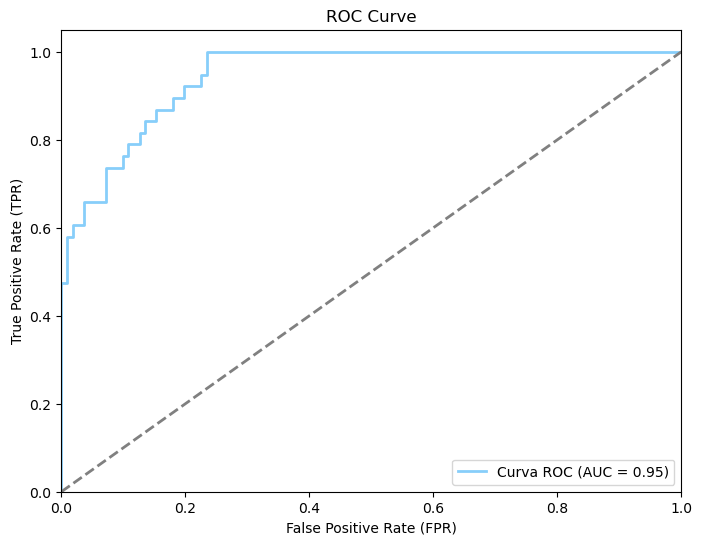

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(df.pIC50, df.preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='lightskyblue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - CLASS 2')
plt.legend(loc='lower right')
plt.show()
